**Assignment No. 2:- Implementing Feed-forward neural networks with Keras and TensorFlow**

In [ ]:
# Import necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 12s 6ms/step - loss: 1.0485 - accuracy: 0.7325 - val_loss: 0.4561 - val_accuracy: 0.8810
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4099 - accuracy: 0.8881 - val_loss: 0.3375 - val_accuracy: 0.9066
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.9064 - val_loss: 0.2918 - val_accuracy: 0.9175
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2947 - accuracy: 0.9165 - val_loss: 0.2657 - val_accuracy: 0.9242
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2685 - accuracy: 0.9236 - val_loss: 0.2474 - val_accuracy: 0.9295
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2487 - accuracy: 0.9292 - val_loss: 0.2302 - val_accuracy: 0.9338
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2315 -

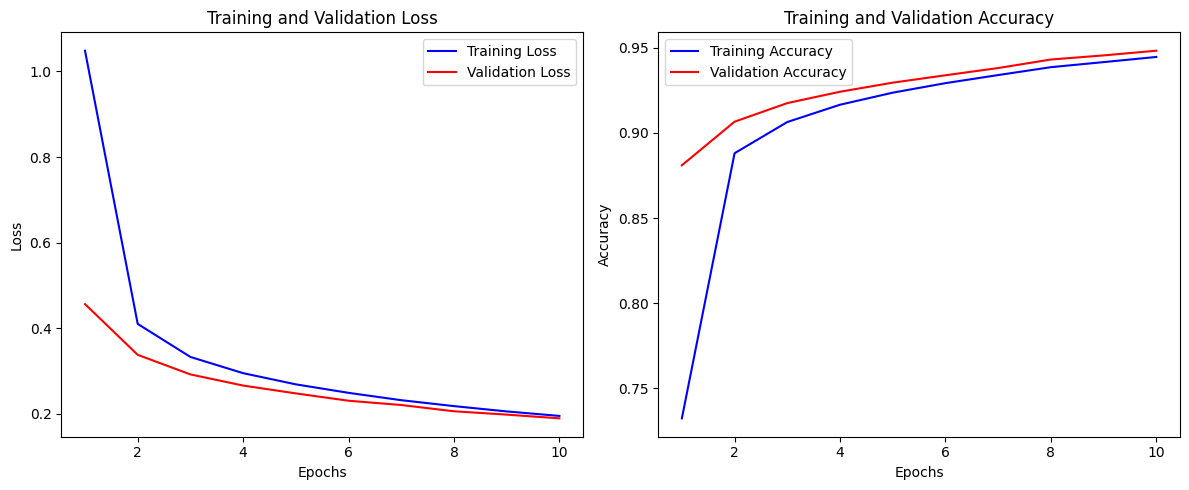

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the input data (28x28 images to 784 pixels)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Define the network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the network on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Assignment No. 3:- Build the Image classification model by dividing the model**

In [ ]:
# Import necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Stage a: Loading and preprocessing the image data
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Stage b: Defining the model's architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Stage c: Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

# Stage d: Estimating the model's performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
782/782 [==============================] - 12s 6ms/step - loss: 1.5645 - accuracy: 0.4289 - val_loss: 1.2748 - val_accuracy: 0.5454
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2089 - accuracy: 0.5709 - val_loss: 1.1316 - val_accuracy: 0.5957
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0732 - accuracy: 0.6234 - val_loss: 1.0540 - val_accuracy: 0.6271
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9762 - accuracy: 0.6582 - val_loss: 0.9664 - val_accuracy: 0.6609
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8994 - accuracy: 0.6832 - val_loss: 1.0055 - val_accuracy: 0.6589
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8443 - accuracy: 0.7058 - val_loss: 0.9269 - val_accuracy: 0.6791
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7916

**Assignment No. 4:- Use Autoencoder to implement anomaly detection.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0341 - val_loss: 0.0202
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0175 - val_loss: 0.0154
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0143 - val_loss: 0.0134
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0098 - val_loss: 0.0100
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


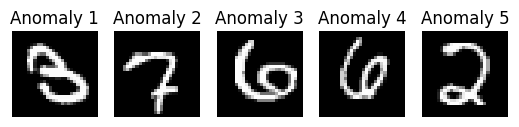

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data into training and testing sets
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

# Define the encoder
input_layer = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Latent representation

# Create the encoder model
encoder = Model(input_layer, encoded)

# Define the decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_val, x_val))

# Evaluate the autoencoder on the test data
reconstruction_errors = np.mean(np.square(x_test - autoencoder.predict(x_test)), axis=1)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Detect anomalies in the test data
anomalies = x_test[reconstruction_errors > threshold]

# Display some of the detected anomalies
n_anomalies_to_display = 5
for i in range(n_anomalies_to_display):
    plt.subplot(1, n_anomalies_to_display, i + 1)
    plt.imshow(anomalies[i].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly {i + 1}')
    plt.axis('off')

plt.show()


**Assignment No. 5:- Implement the Continuous Bag of Words (CBOW) Model.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Sample text data (replace with your own text data)
corpus = [
    'this is a sample sentence',
    'continuous bag of words model',
    'implementation of cbow',
    'natural language processing',
    'deep learning for nlp tasks',
]

# Stage a: Data Preparation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

# Generate word sequences and context-target pairs for CBOW
context_window = 2

def generate_training_data(corpus, tokenizer, window_size):
    sequences = tokenizer.texts_to_sequences(corpus)
    X = []
    y = []
    for sequence in sequences:
        for i in range(window_size, len(sequence) - window_size):
            context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
            target = sequence[i]
            X.append(context)
            y.append(target)
    return np.array(X), np.array(y)

X_train, y_train = generate_training_data(corpus, tokenizer, context_window)

# Stage b: Generate training data (completed above)

# Stage c: Train CBOW model
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=context_window * 2),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(units=vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

# Stage d: Output
word_embeddings = model.layers[0].get_weights()[0]

# Function to find the closest words to a given word
def find_closest_words(word_embeddings, target_word, tokenizer, top_n=5):
    target_word_index = tokenizer.word_index.get(target_word)
    if target_word_index is None:
        return []

    target_embedding = word_embeddings[target_word_index]
    distances = np.linalg.norm(word_embeddings - target_embedding, axis=1)
    closest_indices = np.argsort(distances)[1:top_n + 1]
    closest_words = [word for word, index in tokenizer.word_index.items() if index in closest_indices]
    return closest_words

# Test the CBOW model by finding closest words
target_word = 'cbow'
closest_words = find_closest_words(word_embeddings, target_word, tokenizer)
print(f"Closest words to '{target_word}': {closest_words}")


Epoch 1/100
1/1 - 1s - loss: 3.0407 - 758ms/epoch - 758ms/step
Epoch 2/100
1/1 - 0s - loss: 3.0308 - 9ms/epoch - 9ms/step
Epoch 3/100
1/1 - 0s - loss: 3.0209 - 7ms/epoch - 7ms/step
Epoch 4/100
1/1 - 0s - loss: 3.0110 - 7ms/epoch - 7ms/step
Epoch 5/100
1/1 - 0s - loss: 3.0011 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 2.9912 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 2.9813 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 2.9714 - 7ms/epoch - 7ms/step
Epoch 9/100
1/1 - 0s - loss: 2.9614 - 7ms/epoch - 7ms/step
Epoch 10/100
1/1 - 0s - loss: 2.9513 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 2.9413 - 6ms/epoch - 6ms/step
Epoch 12/100
1/1 - 0s - loss: 2.9311 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 2.9209 - 7ms/epoch - 7ms/step
Epoch 14/100
1/1 - 0s - loss: 2.9106 - 6ms/epoch - 6ms/step
Epoch 15/100
1/1 - 0s - loss: 2.9002 - 6ms/epoch - 6ms/step
Epoch 16/100
1/1 - 0s - loss: 2.8897 - 6ms/epoch - 6ms/step
Epoch 17/100
1/1 - 0s - loss: 2.8791 - 8ms/ep

**Assignment No. 6:- Object detection using Transfer Learning of CNN architectures.**

In [1]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

# Freeze the weights in the model's lower convolutional layers
for layer in model.layers[:3]:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the classifier layers on training data available for the task
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

# Fine-tune hyperparameters and unfreeze more layers as needed
for layer in model.layers[:3]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

# Add output to code
print("Training accuracy: ", history.history['accuracy'][-1])
print("Validation accuracy: ", history.history['val_accuracy'][-1])


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/5
1563/1563 [==============================] - 21s 5ms/step - loss: 1.8775 - accuracy: 0.2969 - val_loss: 1.6886 - val_accuracy: 0.3919
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6760 - accuracy: 0.3851 - val_loss: 1.5186 - val_accuracy: 0.4496
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5961 - accuracy: 0.4172 - val_loss: 1.4709 - val_accuracy: 0.4682
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5473 - accuracy: 0.4383 - val_loss: 1.4267 - val_accuracy: 0.4842
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5089 - accuracy: 0.4516 - val_loss: 1.3805 - val_accuracy: 0.5058
Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4517 - accuracy: 0.4749 - val_loss: 1.3313 - val_accuracy: 0.5229
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - los